In [1]:
from functions.crop_image import random_crop
from functions.load_training_data import training_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load training samples

In [2]:
training_images, training_labels = training_samples(1000, [1,1,1,1])

/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


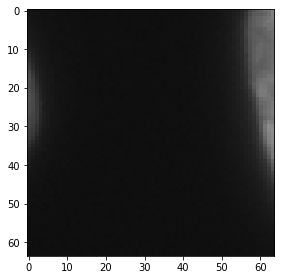

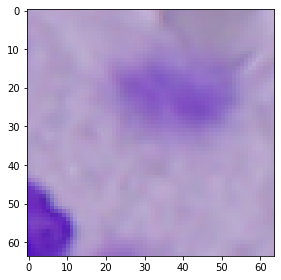

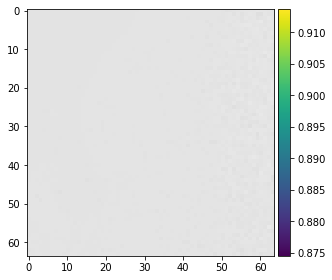

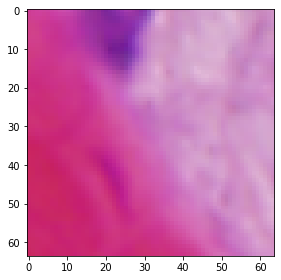

<Figure size 432x288 with 0 Axes>

In [3]:
count = 0
for i in training_images:
    io.imshow(i)
    plt.figure()

    if count == 3: 
        break
    
    count += 1

# Configure GPU for training

In [4]:
from functions.tf_config import config_gpu

config_gpu(5, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 5


# Create model
* be sure that final dense layer reflects the number of categories we're training for

In [5]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(64, 64, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(4)
])

In [6]:
predictions = model(training_images).numpy()
predictions

array([[ 0.00462502,  0.01349942,  0.01482109,  0.02464887],
       [ 0.01886671,  0.08163246, -0.04458305,  0.12635735],
       [ 0.07915814,  0.12545726, -0.07345544,  0.173047  ],
       ...,
       [ 0.04054791,  0.1151047 , -0.0613169 ,  0.14491397],
       [ 0.06267406,  0.06889877, -0.05364767,  0.07431962],
       [ 0.04840577,  0.11176404, -0.05003888,  0.11484775]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.24756227, 0.249769  , 0.25009936, 0.2525694 ],
       [0.24290834, 0.2586433 , 0.22797464, 0.2704737 ],
       [0.24973236, 0.2615666 , 0.2143856 , 0.27431545],
       ...,
       [0.24446501, 0.26338822, 0.22078899, 0.2713578 ],
       [0.25587577, 0.25747347, 0.22777773, 0.25887302],
       [0.2475031 , 0.26369193, 0.22429869, 0.2645063 ]], dtype=float32)

In [8]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(training_labels, predictions).numpy()

1.3961922

In [9]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt,
             loss=loss_fn,
             metrics=['accuracy'])

In [10]:
model.fit(training_images, training_labels, epochs=5, validation_split=.01)

Epoch 1/5
124/124 [==============================] - 1s 9ms/step - loss: 1.0179 - accuracy: 0.6477 - val_loss: 0.6012 - val_accuracy: 0.9750
Epoch 2/5
124/124 [==============================] - 1s 6ms/step - loss: 0.2825 - accuracy: 0.9649 - val_loss: 0.1051 - val_accuracy: 0.9750
Epoch 3/5
124/124 [==============================] - 1s 6ms/step - loss: 0.0911 - accuracy: 0.9753 - val_loss: 0.0771 - val_accuracy: 0.9750
Epoch 4/5
124/124 [==============================] - 1s 6ms/step - loss: 0.0724 - accuracy: 0.9775 - val_loss: 0.0563 - val_accuracy: 0.9750
Epoch 5/5
124/124 [==============================] - 1s 6ms/step - loss: 0.0562 - accuracy: 0.9801 - val_loss: 0.0456 - val_accuracy: 0.9750


In [11]:
# use model.predict to test model
# use the trained model on a random image crop
# create an example of how to use the model once it's trained
# do the same in the regression model (with the predicted avg. size instead of color)

In [87]:
from functions.plot_predictions import plot_image, plot_value_array

In [93]:
probability_model = keras.Sequential([model, 
                                     keras.layers.Softmax()])
predictions = probability_model.predict(training_images)

In [94]:
predictions[0]

array([9.9830961e-01, 1.2113531e-04, 4.0290272e-04, 1.1663008e-03],
      dtype=float32)

In [81]:
test_images, test_labels = training_samples(20, [1,1,1,1])

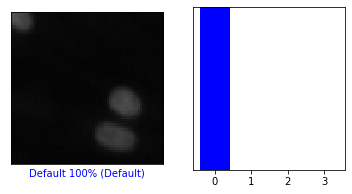

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

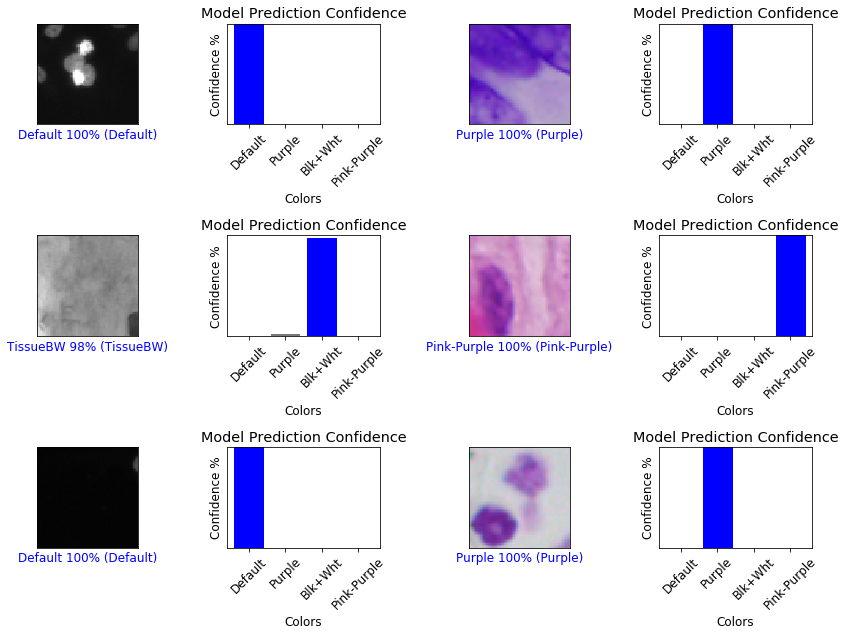

In [91]:
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*3*num_cols, 3*num_rows))
plt.rcParams.update({'font.size': 12})
class_names = ["Default", "Purple", "Blk+Wht", "Pink-Purple"]
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(x=class_names,
           height="Confidence")
    plt.title("Model Prediction Confidence")
    plt.xlabel("Colors")
    plt.ylabel("Confidence %")
    plt.xticks(rotation=45)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()